In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("../../data/Symphony-Data.csv")
data.head()

,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%)
0,13-Jun-24,1242.20,1244.0,1260.90,1226.80,154710,1.18%
1,12-Jun-24,1227.70,1210.0,1244.00,1204.00,246676,1.51%
2,11-Jun-24,1209.40,1163.4,1221.00,1157.30,472663,3.96%
3,10-Jun-24,1163.30,1145.0,1169.95,1137.05,157659,1.08%
4,07-Jun-24,1150.85,1108.0,1160.75,1103.70,359926,3.90%


In [10]:
data = data.drop(["OPEN", "HIGH", "LOW", "VOLUME", "CHANGE(%)"], axis =1)


In [12]:
data["DATE"]= pd.to_datetime(data["DATE"], format="%d-%b-%y")
data["YEAR"]= data["DATE"].dt.year
data["MONTH"]= data["DATE"].dt.month
data.head()

,DATE,PRICE,YEAR,MONTH
0,2024-06-13,1242.20,2024,6
1,2024-06-12,1227.70,2024,6
2,2024-06-11,1209.40,2024,6
3,2024-06-10,1163.30,2024,6
4,2024-06-07,1150.85,2024,6


In [19]:
table1 = data.groupby(["YEAR", "MONTH"])["PRICE"].mean()
table1.unstack()

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2019,NaN,NaN,NaN,NaN,NaN,1228.622222,1232.097826,1243.562500,1262.131579,1262.175000,1208.607500,1130.973810
2020,1190.458696,1308.130000,1026.030952,909.255556,821.036842,893.779545,869.536957,859.064286,868.395455,859.559524,836.897500,926.211364
2021,1035.175000,1041.697500,1302.271429,1228.252632,1092.557500,1063.502273,1038.233333,927.695238,1013.559524,1065.400000,1022.830000,984.352174
2022,1029.857500,982.315000,1048.930952,1141.181579,1064.476190,913.806818,895.857143,918.367500,889.140909,861.802632,852.154762,914.211364
2023,960.028571,1051.925000,1118.080952,991.452941,893.897727,894.361905,878.388095,881.825000,892.525000,858.872500,866.192857,879.180000
2024,922.436364,921.442857,859.702632,954.280000,1001.145455,1143.711111,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
lrTable =[]
years = table1.index.get_level_values(0).unique()

#months = table1.index.get_level_values(1).unique()
for i,year in enumerate(years):
    months = table1[year].index
    row =[]
    print(year)
    for j,month in enumerate(months):
        if i==0 and j==0:
            continue
        if j==0 and i>0:
            previousVal = table1[year-1][10]
        else:
            previousVal = table1[year][month-1]
            
        row.append(table1[year][month]*100/previousVal)
        
    if(len(row)<12 and i==0):
        row =[None]*(12-len(row))+row
        #print(temp)
        #print(row)
            
    lrTable.append(row)

lrTable = pd.DataFrame(lrTable).stack()
lrTable.index = lrTable.index.set_levels([[2019, 2020, 2021, 2022, 2023,2024],[1,2,3,4,5,6,7,8,9,10,11,12]])
lrTable.unstack()
#lrTable.stack().index

2019
2020
2021
2022
2023
2024


,1,2,3,4,5,6,7,8,9,10,11,12
2019,NaN,NaN,NaN,NaN,NaN,NaN,100.282886,100.930500,101.493216,100.003440,95.755937,93.576600
2020,94.318038,109.884535,78.434938,88.618726,90.297699,108.859859,97.287632,98.795604,101.086201,98.982499,97.363531,110.672019
2021,120.430869,100.630087,125.014357,94.316177,88.952181,97.340623,97.623988,89.353251,109.255657,105.114695,96.004318,96.238102
2022,96.663929,95.383585,106.781527,108.794728,93.278424,85.845679,98.035725,102.512717,96.817550,96.925316,98.880501,107.282316
2023,111.397730,109.572260,106.289037,88.674522,90.160379,100.051927,98.213943,100.391274,101.213393,96.229517,100.852322,101.499336
2024,107.400850,99.892295,93.299614,111.001172,104.911080,114.240254,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
#chained relative calc starts

monthlyAvg = lrTable.unstack().mean(axis=0)
monthlyAvg

1     106.042283
2     103.072552
3     101.963894
4      98.281065
5      93.519952
6     101.267668
7      98.288835
8      98.396669
9     101.973203
10     99.451093
11     97.771322
12    101.853675
dtype: float64

In [62]:
chainedRel = [100]
for i in range(1,len(monthlyAvg)):
    chainedRel.append((chainedRel[i-1]*monthlyAvg[i])/100)
chainedRel

[100,
 106.04228312814685,
 109.30048769303392,
 111.44703393133251,
 109.53133205631306,
 102.43364962301973,
 103.73216865049218,
 101.95714018798103,
 100.32243006109098,
 102.30199559420376,
 101.74045322677667,
 99.47298580392659]

In [65]:
perYearCorrection = ((monthlyAvg[1]*chainedRel[-1])/100)-100
perMonthCorrection= perYearCorrection/12
correctedChainedRel =[100]
for i in range(1, len(chainedRel)):
    correctedChainedRel.append(chainedRel[i] - (i*perMonthCorrection))
correctedChainedRel

[100,
 105.58533102462842,
 108.38658348599705,
 110.07617762077723,
 107.70352364223935,
 100.14888910542759,
 100.9904560293816,
 98.75847546335201,
 96.66681323294354,
 98.1894266625379,
 97.17093219159237,
 94.44651266522386]

In [68]:
generalAvg = np.array(correctedChainedRel).mean()

seasonalIndices = pd.Series(np.array(correctedChainedRel)*100/generalAvg)
seasonalIndices.index = monthlyAvg.index
seasonalIndices

1      98.512209
2     104.014442
3     106.774018
4     108.438475
5     106.101121
6      98.658883
7      99.487930
8      97.289156
9      95.228613
10     96.728574
11     95.725232
12     93.041346
dtype: float64

In [81]:
deseasonalizedData = table1.unstack()*100/seasonalIndices
deseasonalizedData= deseasonalizedData.stack()

Text(0.5, 1.0, 'Deseasonalized using link relatives')

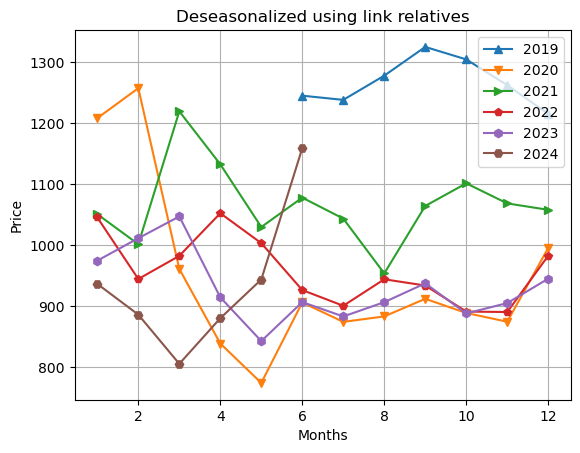

In [84]:
index = deseasonalizedData.index
years = index.get_level_values(0).unique()
markers =["^","v", ">", "p", "h", "H"]
for year in years:
    plt.plot(deseasonalizedData[year].index, deseasonalizedData[year], label=str(year), marker=markers[year%2019])
plt.legend()
plt.grid()
plt.xlabel("Months")
plt.ylabel("Price")
plt.title("Deseasonalized using link relatives")